In [2]:
import pandas as pd
import numpy as np
import csv
from tqdm import tqdm

###### data loading

In [3]:
from rdkit import Chem
from rdkit.Chem import AllChem, DataStructs, Descriptors, ReducedGraphs
from rdkit.ML.Descriptors import MoleculeDescriptors

In [5]:
def descriptors(mol):
    """
    calcualte all 208 descriptors
    """
    descs = []
    calc = MoleculeDescriptors.MolecularDescriptorCalculator([x[0] for x in Descriptors._descList])        
    header = calc.GetDescriptorNames()
    descs = [calc.CalcDescriptors(x) for x in mol]
    descs = pd.DataFrame(descs, columns=header)
    return descs

In [6]:
smiles = []
logs = []
with open("/home/sphalo/data_science/data/logS.txt", "r") as f:
    reader = csv.reader(f, delimiter=" ")
    for row in reader:
        smiles.append(row[1])
        logs.append(float(row[2])) 
    
print(smiles[:5], logs[:5])

['CC(N)=O', 'CNN', 'CC(O)=O', 'C1CCCN1', 'NC([NH]O)=O'] [1.58, 1.34, 1.22, 1.15, 1.12]


In [7]:
np.shape(logs)

(1311,)

In [8]:
molec = [Chem.MolFromSmiles(x) for x in tqdm(smiles)]

100%|████████████████████████████████████████████████████████| 1311/1311 [00:00<00:00, 11257.88it/s]


In [9]:
descr = descriptors(molec)
descr.head(2)

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,9.222222,-0.333333,9.222222,0.333333,0.401031,59.068,54.028,59.037114,24,0,...,0,0,0,0,0,0,0,0,0,0
1,4.597222,1.652778,4.597222,1.652778,0.273315,46.073,40.025,46.053098,20,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
descr.shape

(1311, 208)

###### Features and Targets

In [11]:
X = descr
y = logs

###### Data Split

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=2)

###### Model Training

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

###### Model Evaluation

In [17]:
from sklearn.metrics import mean_absolute_error, r2_score, make_scorer

In [18]:
y_pred_train = model.predict(X_train)
print(f"Train set R^2: %.4f" % r2_score(y_train, y_pred_train))
print("Train MAE score: %.4f" % mean_absolute_error(y_train, y_pred_train))
print()

y_pred_test = model.predict(X_test)
print("Test set R^2: %.4f" % r2_score(y_test, y_pred_test))
print("Test MAE score: %.4f" % mean_absolute_error(y_test, y_pred_test))

Train set R^2: 0.9418
Train MAE score: 0.3791

Test set R^2: 0.8816
Test MAE score: 0.4943


In [19]:
import matplotlib.pyplot as plt
plt.rcdefaults()

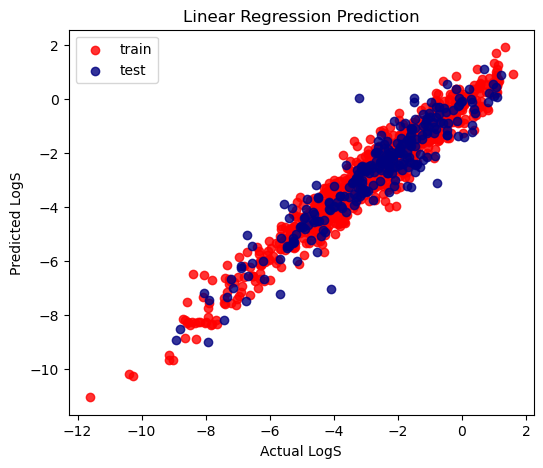

In [21]:
plt.title("Linear Regression Prediction")
plt.xlabel("Actual LogS")
plt.ylabel("Predicted LogS")
plt.rcParams["figure.figsize"] = [6, 5]
plt.scatter(y_train, y_pred_train, 
            color="red", alpha=0.8, label="train")
plt.scatter(y_test, y_pred_test, 
            color="navy", alpha=0.8, label="test")
plt.legend(loc = 'best')
plt.show()

###### Feature Scaling

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()
scaler.fit(X_train)

model = LinearRegression()
model.fit(scaler.transform(X_train),y_train)

LinearRegression()

In [24]:
y_pred_train = model.predict(scaler.transform(X_train))
print("Train set R^2: %.4f" % r2_score(y_train, y_pred_train))
print("Train MAE score: %.4f" % mean_absolute_error(y_train, y_pred_train))
print()

y_pred_test = model.predict(scaler.transform(X_test))
print("Test set R^2: %.4f" % r2_score(y_test, y_pred_test))
print("Test MAE score: %.4f" % mean_absolute_error(y_test, y_pred_test))

Train set R^2: 0.9418
Train MAE score: 0.3791

Test set R^2: 0.8819
Test MAE score: 0.4941


In [ ]:
# from model evaluation it can be noted that feature scalling did not impact our model perfomance

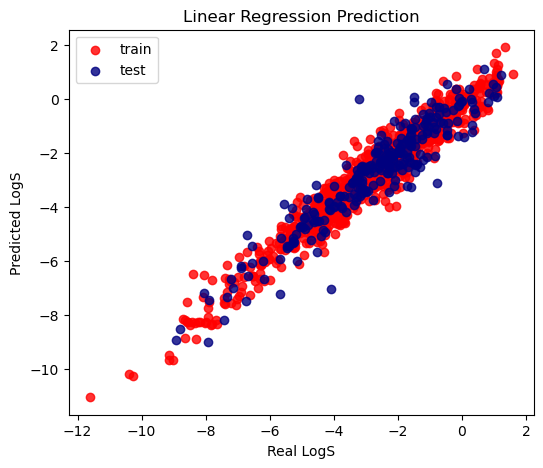

In [25]:
plt.title("Linear Regression Prediction")
plt.xlabel("Real LogS")
plt.ylabel("Predicted LogS")
plt.rcParams["figure.figsize"] = [6, 5]
plt.scatter(y_train, y_pred_train, 
            color="red", alpha=0.8, label="train")
plt.scatter(y_test, y_pred_test, 
            color="navy", alpha=0.8, label="test")
plt.legend(loc = 'best')
plt.show()